In [177]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [178]:
# Load S%P 500 constituent data

spdata = pd.read_csv('C:/Users/Erik/Desktop/Workspace/final_project/Resources/constituents-financials_csv.csv')
spdata.head()


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.39,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.93,1.078342e+10,6.010000e+08,3.58,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.74,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.29,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,9.876586e+10,5.643228e+09,2.60,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [179]:
# Data Cleaning
spdata.columns = ['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend_Yield', 'Earnings/Share', 
                  '52_Week_Low', '52_Week_High', 'Market_Cap', 'EBITDA', 'Price/Sales', 'Price/Book', 'SEC_Filings']
spdata.drop(columns=['SEC_Filings'])

#Additional work can be done here to replace values in Lieu of dropping rows with missing data
#This requires additional stock metrics such as "Market Value per Share
spdata.dropna(inplace=True)
spdata['Dividend_Yield'] = spdata['Dividend_Yield'].replace({' $-   ': 0})
spdata.count()

Symbol            495
Name              495
Sector            495
Price             495
Price/Earnings    495
Dividend_Yield    495
Earnings/Share    495
52_Week_Low       495
52_Week_High      495
Market_Cap        495
EBITDA            495
Price/Sales       495
Price/Book        495
SEC_Filings       495
dtype: int64

# Analysis 1: Price/Earnings vs. Price/Book

### P/E
- Higher values typically indicate that investors expect future growth.
- Better when used to compare stocks within the same industry.
- https://www.investopedia.com/terms/p/price-earningsratio.asp

### P/B
- ratio of market value of a stock to its bookvalue
- P/B < 1.0 is typically considered a good investment
- P/B < 3.0 is typically used as a benchmark
- https://www.investopedia.com/terms/p/price-to-bookratio.asp

### The Cluster
- Clusters with low P/B and High P/E are considered good investments



In [200]:
# Create Array of Samples "X1" for Price/Earnings vs. Price
X1_df = spdata.loc[:, spdata.columns.intersection(['Price/Book', 'Price/Earnings'])]
X1 = X1_df.values
#X1

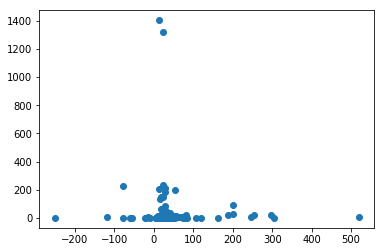

In [201]:
plt.scatter(X1[:, 0], X1[:,1])
plt.show()

In [202]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [203]:
# Predict the clusters
predicted_clusters = kmeans.predict(X1)

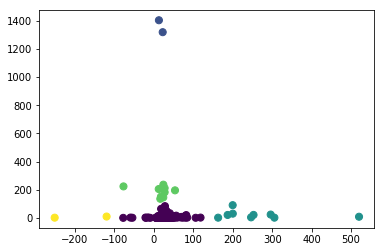

In [204]:
plt.scatter(X1[:, 0], X1[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

# Analysis 2: EBITDA vs. Market Capitalization

In [174]:
# Create Array of Samples "X2" for EBITDA vs. Market_Cap
X2_df = spdata.loc[:, spdata.columns.intersection(['Market_Cap', 'EBITDA'])]
X2_df.head()
X2 = X2_df.values
#X2

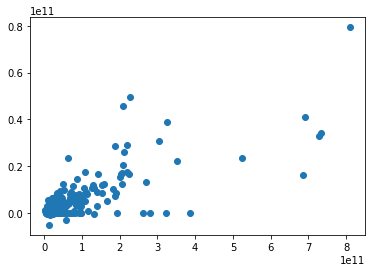

In [164]:
plt.scatter(X2[:, 0], X2[:,1])
plt.show()

In [165]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [166]:
# Predict the clusters
predicted_clusters = kmeans.predict(X2)

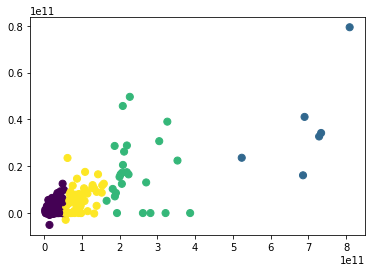

In [175]:
plt.scatter(X2[:, 0], X2[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

# Analysis 3: Price/Earnings vs. Price/Sales

### P/E 
- Higher values typically indicate that investors expect future growth
- Better when used to compare stocks within the same industry
- https://www.investopedia.com/terms/p/price-earningsratio.asp

### P/S
- Indicates the market valuation of each dollar of a company's sales
- The lower the P/S ratio, the more attractive the investment
- https://www.investopedia.com/articles/fundamental/03/032603.asp

### The Cluster
- P/E will be plotted against P/S
- The samples will be clustered to determine which stocks are viable investments based on this metric
- The successful clustering will have a higher P/E indicating growth potential, and a low P/S ratio


In [188]:
# Create Array of Samples "X3" for Price/Sales vs. Price/Earnings
X3_df = spdata.loc[:, spdata.columns.intersection(['Price/Sales', 'Price/Earnings'])]
X3_df.head()
X3 = X3_df.values
#X3

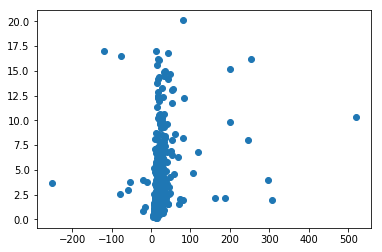

In [196]:
plt.scatter(X3[:, 0], X3[:,1])
plt.show()

In [197]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=8)

# Fit the model to the data
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [198]:
# Predict the clusters
predicted_clusters = kmeans.predict(X3)

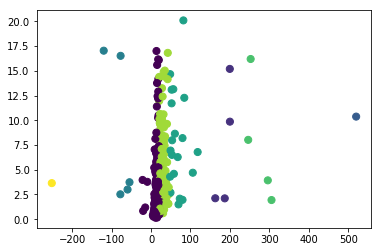

In [199]:
plt.scatter(X3[:, 0], X3[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

# Analysis 4: Price/Book vs. 

### P/B 
-ratio of market value of a stock to its bookvalue
-P/B < 1.0 is typically considered a good investment
-P/B < 3.0 is typically used as a benchmark
https://www.investopedia.com/terms/p/price-to-bookratio.asp

### 


### The Cluster


